In [1]:
# need to do this for non-installed-package imports (e.g. the NISAR package)
import sys
sys.path.append('..')

In [2]:
from NISAR import GSLC

import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, show_hist

In [3]:
%%time
# lazy-load of just the metadata
ds = GSLC('../reference/NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5')

CPU times: total: 15.6 ms
Wall time: 43.6 ms


In [4]:
# listing of available polarisations in product
ds.available_polarisations

['HH']

In [5]:
# can access the projection of the geocoded data
ds.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

POLYGON Z ((-118.227728642423 34.2428951999307 660.999999999684, -118.144087768027 34.2571630898993 660.999999998754, -118.062650578843 34.2709957213297 660.999999999663, -117.983226657698 34.2844300141958 661.000000001924, -117.90565089823 34.2974979813476 661.000000001054, -117.829779049101 34.3102275923264 661.000000001044, -117.75548421752 34.3226434512113 661.000000000327, -117.682654091239 34.3347673351825 661.000000001122, -117.611188706524 34.3466186272435 660.999999997971, -117.540998636476 34.3582146674516 661.000000000229, -117.472003506891 34.3695710406526 661.000000001246, -117.495986630525 34.4682914412712 661.000000000211, -117.520000951653 34.5670082487801 661.00000000086, -117.54404667726 34.6657214530907 660.999999999728, -117.56812401506 34.7644310416292 661.000000000297, -117.592233174081 34.8631370017848 661.00000000033, -117.616374364679 34.9618393209094 660.99999999754, -117.640547798542 35.0605379863157 660.999999999513, -117.664753688712 35.1592329852772 660.99

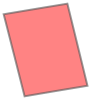

In [6]:
# can access the image geometry in geographic coordinates (shows as shape in notebooks)
print(ds.footprint)
ds.footprint

In [7]:
%%time
image_dict = ds.load_data('HH')
image_dict

CPU times: total: 688 ms
Wall time: 5.03 s


{'HH': array([[nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        ...,
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]],
       dtype=complex64)}

In [8]:
# convert complex to amplitude
hh = np.abs(image_dict['HH'])
# convert to decibels
hh_dB = 10 * np.log10(hh)
# need to mask out any inf values
hh_dB[~np.isfinite(hh_dB)] = np.nan

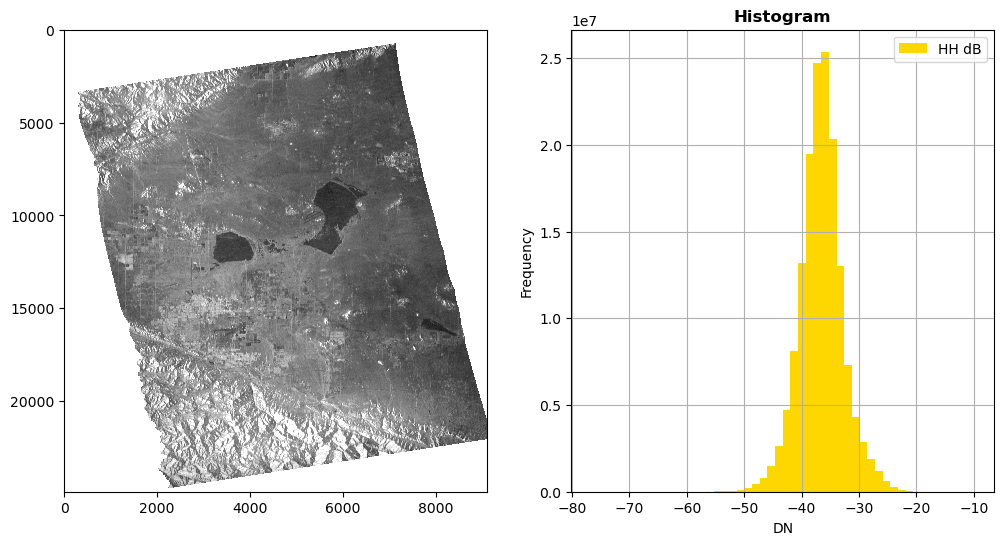

In [9]:
# apply a 5% clip for viewing
vmin, vmax = np.nanpercentile(hh_dB, (5, 95))

fig, (ax_img, ax_hist) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
show(hh_dB, vmin=vmin, vmax=vmax, cmap='grey', ax=ax_img, aspect='auto')
show_hist(hh_dB, bins=50, title='Histogram', label='HH dB', ax=ax_hist);